#Dynamical chaos

This notebook aims to provide some examples of dynamical systems demonstrating chaotical behaviour. We'll start from simple reccurent equations and go forward to space-time distributed systems.

Most examples are taken from the book "Dynamical chaos" by S.Kuznetsov available in Russian.

## Definitions
* *Dynamical system* – object of various nature if it can be described by some *dynamical variables* determining *system state* and evolution of the system can be described by some *arbitrary rule*
* *Dissipative system* – kind of a system where dynamics after transient process becomes independent on initial conditions
* *Attractor* – set of dynamical states in a dissipative system after the transient process is completed

In [34]:
%pylab
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#import matplotlib
#matplotlib.style.use('ggplot')

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [27]:
def iterator(f, x0=0, skip=20, iters=40, inf=1000):
    """
        Iterator function returns iterator for given function f.
        
        Parameters:
        f            iterating function of one argument
        x0           initial condition
        skip         number of items items to be skipped to eliminate transient process
        iters        maximum number of iterations
        inf          maximum next absolute value of a variable when iteration stops
    """
    x, i = x0, 0  # x - iteration value, i - counter
    while abs(x) < inf and i < iters:
        if i >= skip:
            yield x
        x, i = f(x), i+1

In [208]:
def diagram_points(xs):
    """
        diagram_points takes list of numbers and returns a list
        of tuples where each tuple corresponds to a point
        on iterative diagram for the numbers.
    """
    result = [(xs[0], 0)]
    for x, y in zip(xs, xs[1:]):
        result.append((x,x))
        result.append((x,y))
    return result
    
assert diagram_points([1,2,3]) == [(1,0), (1,1), (1,2), (2,2), (2,3)]

In [209]:
def linspace(start=1.0, stop=10.0, step=1.0):
    """
        linspace returns list of linear space steps from start to stop
        devided by step
    """
    return [start+i*step for i in range(int((stop-start)/step)+1)]

assert linspace(1,3,0.5) == [1, 1.5, 2, 2.5, 3]
assert linspace() == [1,2,3,4,5,6,7,8,9,10]

In [210]:
# boundary is a function which returns boundary curve for given function
boundary = lambda f, limits: pd.DataFrame([(x, f(x)) for x in linspace(limits[0], limits[1], 0.001)])

## Sawtooth map

Let's examine simple system where each next element is derived by previous element by the following rule:

$$x_{n+1}=\{2 x_n\}$$

where operator $\{\}$ means taking decimal part of a number.

In [35]:
#from math import trunc
assert trunc(1.5) == 1.0
assert trunc(12.59) == 12.0
assert trunc(1) == 1.0

In [212]:
sawtooth = lambda x: round(2*x-trunc(2*x), 8)
xs = list(iterator(sawtooth, x0=0.41, skip=0, iters=10))

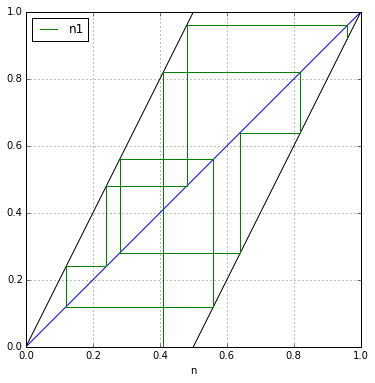

In [219]:
# let's plot x_{n+1} over x_n of sawtooth map in iterative diagram

df = pd.DataFrame(diagram_points(xs), columns=('n', 'n1'))
limits = [0,1]

ax = pd.DataFrame(zip(limits,limits)).plot(x=0, y=1, xlim=limits, ylim=limits, legend=False, figsize=(6, 6))
ax = pd.DataFrame([(0,0),(0.5,1)]).plot(x=0, y=1, ax=ax, legend=False, color='k')
ax = pd.DataFrame([(0.5,0),(1,1)]).plot(x=0, y=1, ax=ax, legend=False, color='k')
df.plot(x='n', y="n1", style='-', ax=ax)


## Logistic equation - simple equation with chaotic dynamics
Here we have very simple equation:
$$x_{n+1} = 1 - k x_n^2$$
where $k$ is some fixed constant.

In [234]:
logistic = lambda x: 1-2*x*x
xs = list(iterator(logistic, x0=0.41, skip=0, iters=10))

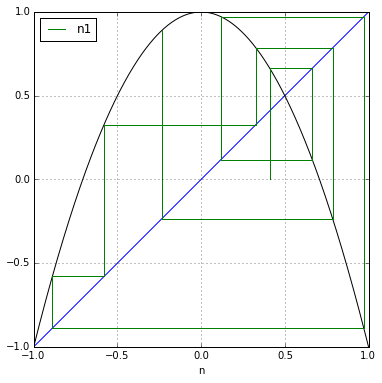

In [235]:
df = pd.DataFrame(diagram_points(xs), columns=('n', 'n1'))

limits = [-1,1]

ax = pd.DataFrame(zip(limits, limits)).plot(x=0, y=1, xlim=limits, ylim=limits, legend=False, figsize=(6, 6))
ax = boundary(logistic, limits).plot(x=0, y=1, ax=ax, legend=False, color='k')
df.plot(x='n', y="n1", style='-', ax=ax)

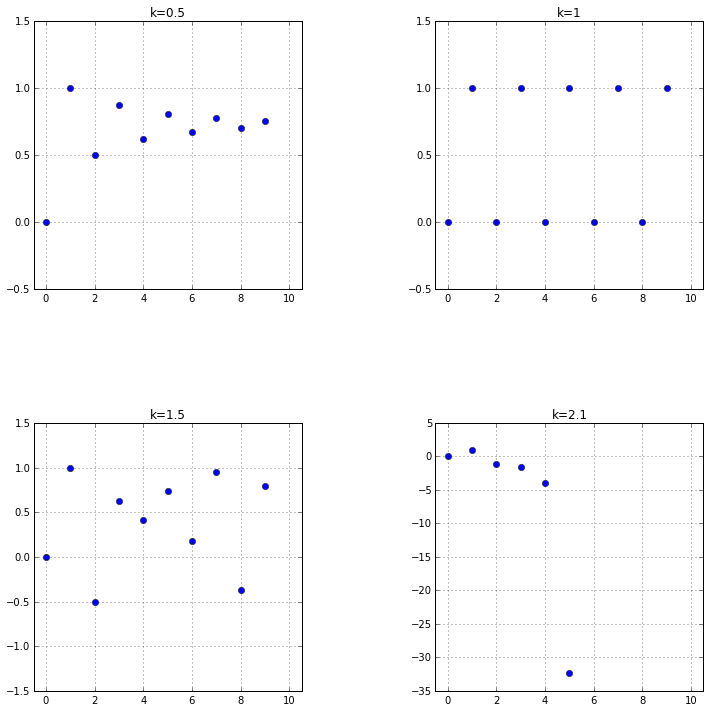

In [16]:
ks = [0.5, 1, 1.5, 2.1]
df = pd.DataFrame([list(y(k)) for k in ks], index=ks).transpose()

fig, axes = plt.subplots(2, 2, figsize=(12, 12));
plt.subplots_adjust(wspace=0.5, hspace=0.5);
df[ks[0]].plot(style='o', ax=axes[0,0], xlim=[-0.5, 10.5], ylim=[-0.5, 1.5]); axes[0,0].set_title('k=%s'%str(ks[0]));
df[ks[1]].plot(style='o', ax=axes[0,1], xlim=[-0.5, 10.5], ylim=[-0.5, 1.5]); axes[0,1].set_title('k=%s'%str(ks[1]));
df[ks[2]].plot(style='o', ax=axes[1,0], xlim=[-0.5, 10.5], ylim=[-1.5, 1.5]); axes[1,0].set_title('k=%s'%str(ks[2]));
df[ks[3]].plot(style='o', ax=axes[1,1], xlim=[-0.5, 10.5]); axes[1,1].set_title('k=%s'%str(ks[3]));

#df.plot(style='o', ax = axes, subplots=True, sharex=True, sharey=False, xlim=[-0.5, 10.5])